<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Air_Quality_Data_Value_Prediction_with_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Air_Quality.csv')

In [3]:
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


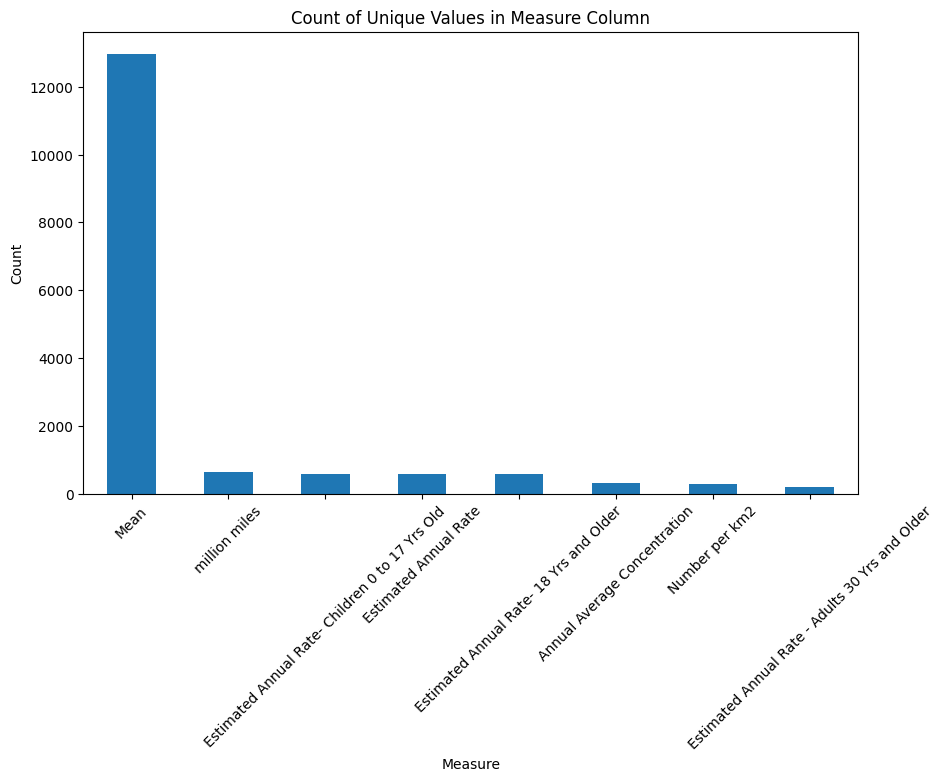

In [5]:
measure_counts = data['Measure'].value_counts()

plt.figure(figsize=(10, 6))
measure_counts.plot(kind='bar')
plt.title('Count of Unique Values in Measure Column')
plt.xlabel('Measure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

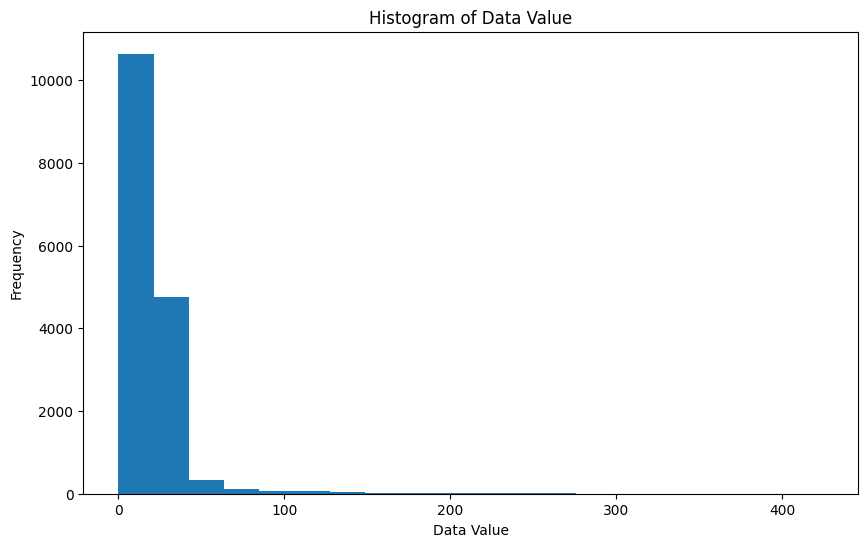

In [6]:
plt.figure(figsize=(10, 6))
data['Data Value'].plot(kind='hist', bins=20)
plt.title('Histogram of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

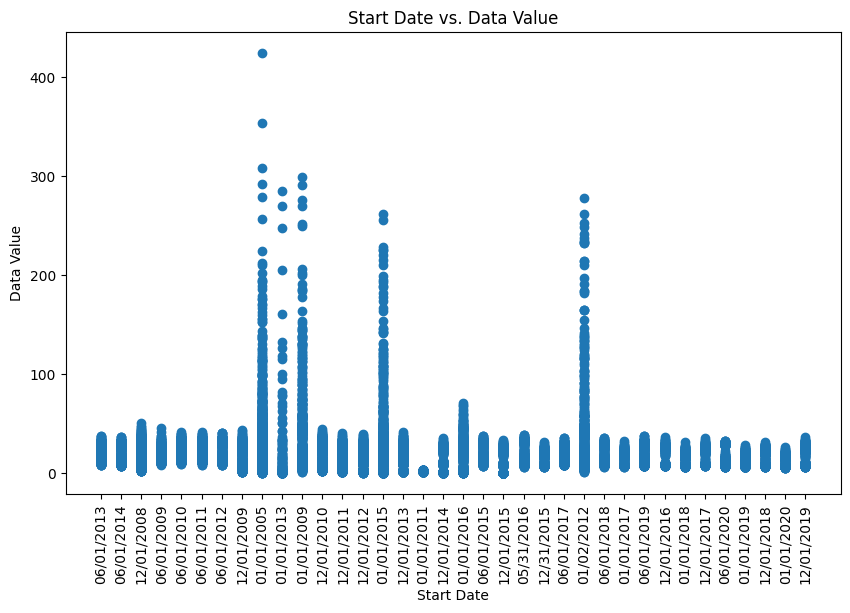

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Start_Date'], data['Data Value'])
plt.title('Start Date vs. Data Value')
plt.xlabel('Start Date')
plt.ylabel('Data Value')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

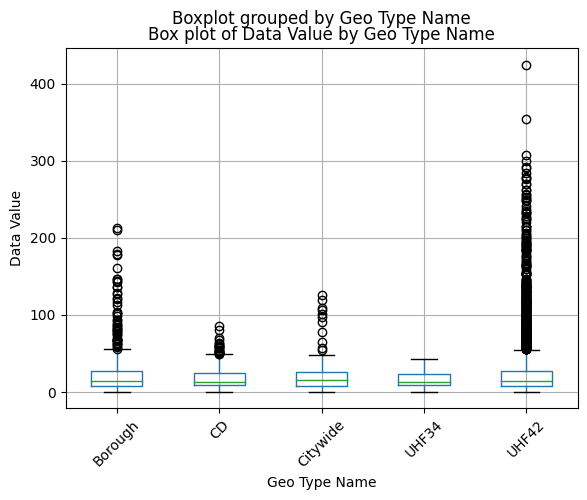

In [8]:
plt.figure(figsize=(10,6))
data.boxplot(column='Data Value',by='Geo Type Name')
plt.title('Box plot of Data Value by Geo Type Name')
plt.xlabel('Geo Type Name')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.show()

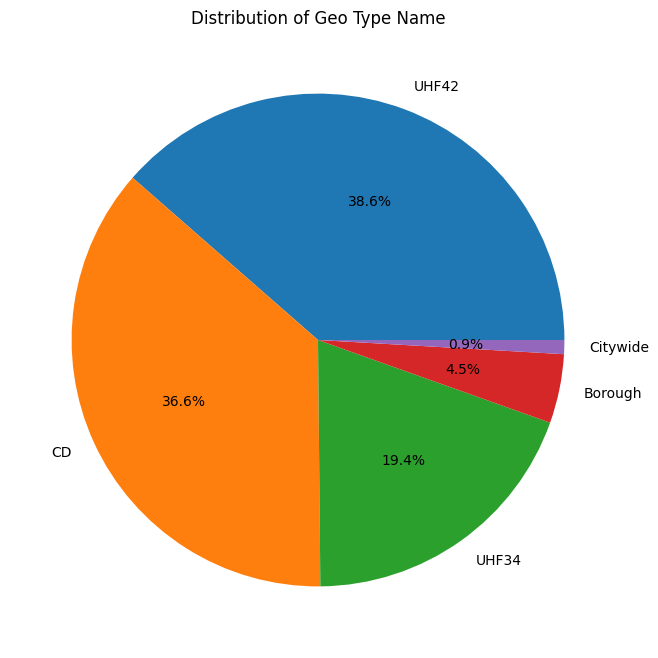

In [9]:
plt.figure(figsize=(8,8))
geo_type_counts=data['Geo Type Name'].value_counts()
plt.pie(geo_type_counts,labels=geo_type_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Geo Type Name')
plt.show()

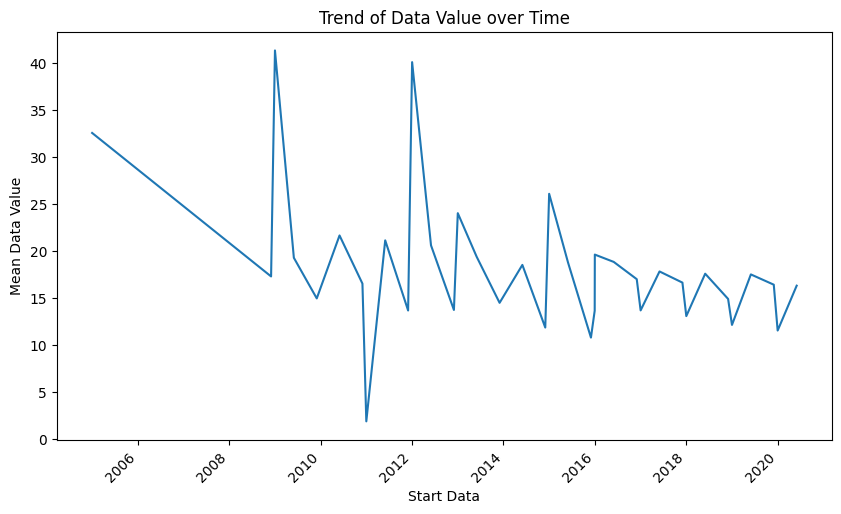

In [10]:
data['Start_Date']=pd.to_datetime(data['Start_Date'])


plt.figure(figsize=(10,6))
data.groupby('Start_Date')['Data Value'].mean().plot()
plt.title('Trend of Data Value over Time')
plt.xlabel('Start Data')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

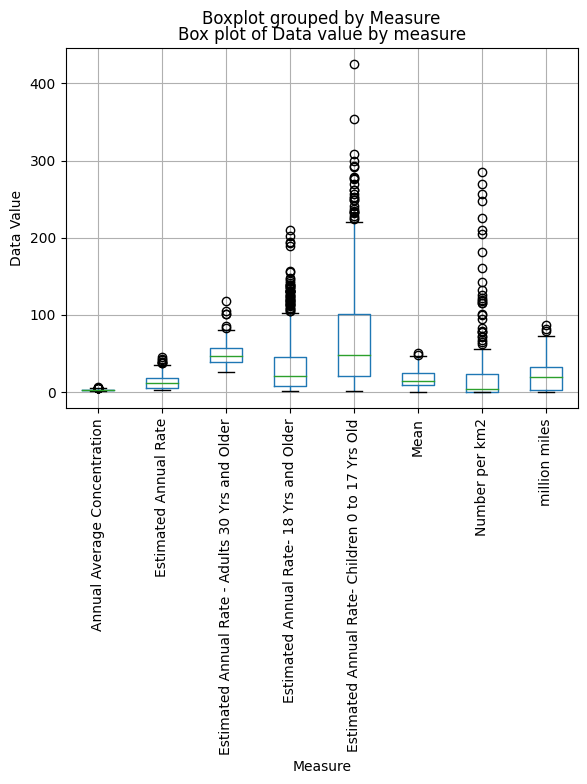

In [11]:
plt.figure(figsize=(10,6))
data.boxplot(column='Data Value',by='Measure',rot=90)
plt.title('Box plot of Data value by measure')
plt.xlabel('Measure')
plt.ylabel('Data Value')
plt.show()

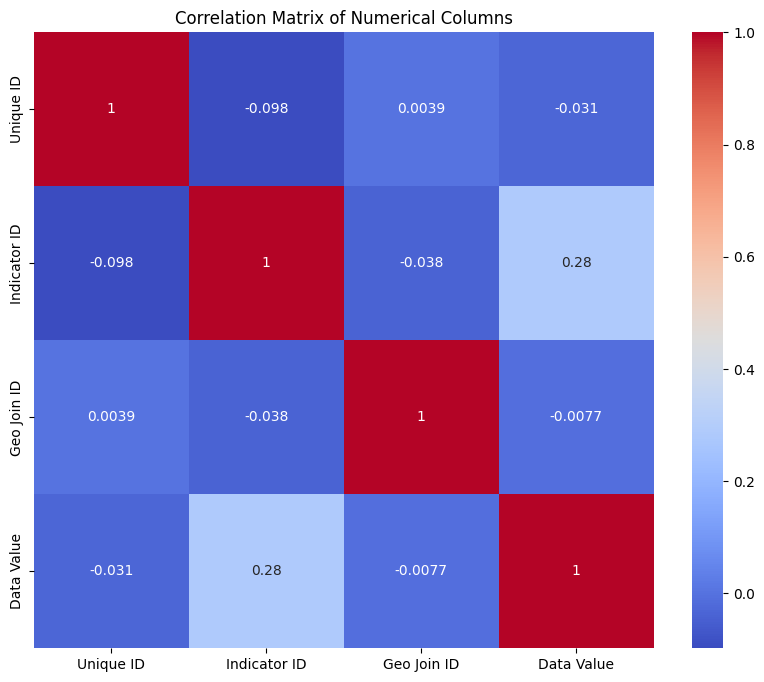

In [12]:
import seaborn as sns
numeric_cols=['Unique ID','Indicator ID','Geo Join ID','Data Value']

corr_matrix=data[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

<Figure size 1000x600 with 0 Axes>

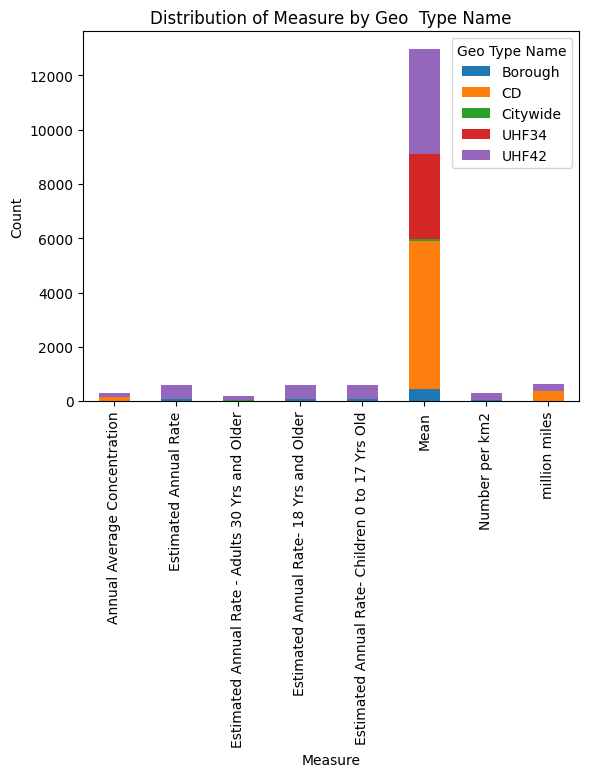

In [13]:
plt.figure(figsize=(10,6))
measure_geo_counts=data.groupby(['Measure','Geo Type Name']).size().unstack()
measure_geo_counts.plot(kind='bar',stacked=True)
plt.title('Distribution of Measure by Geo  Type Name')
plt.xlabel('Measure')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Geo Type Name')
plt.show()

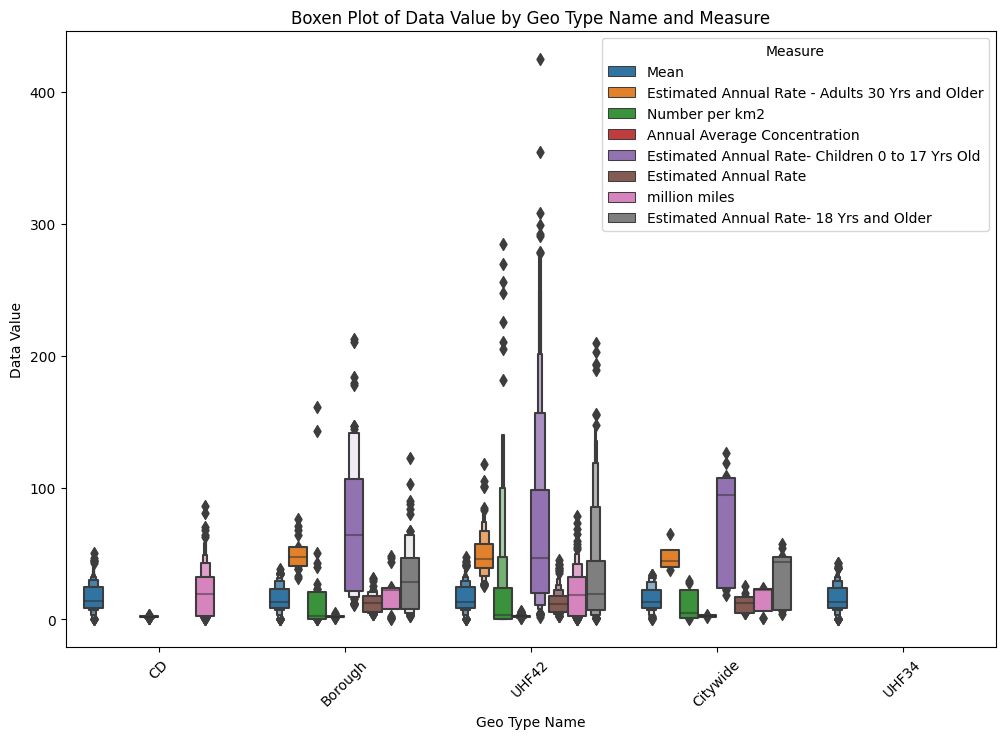

In [14]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='Geo Type Name', y='Data Value', hue='Measure', data=data)
plt.title('Boxen Plot of Data Value by Geo Type Name and Measure')
plt.xlabel('Geo Type Name')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.legend(title='Measure')
plt.show()

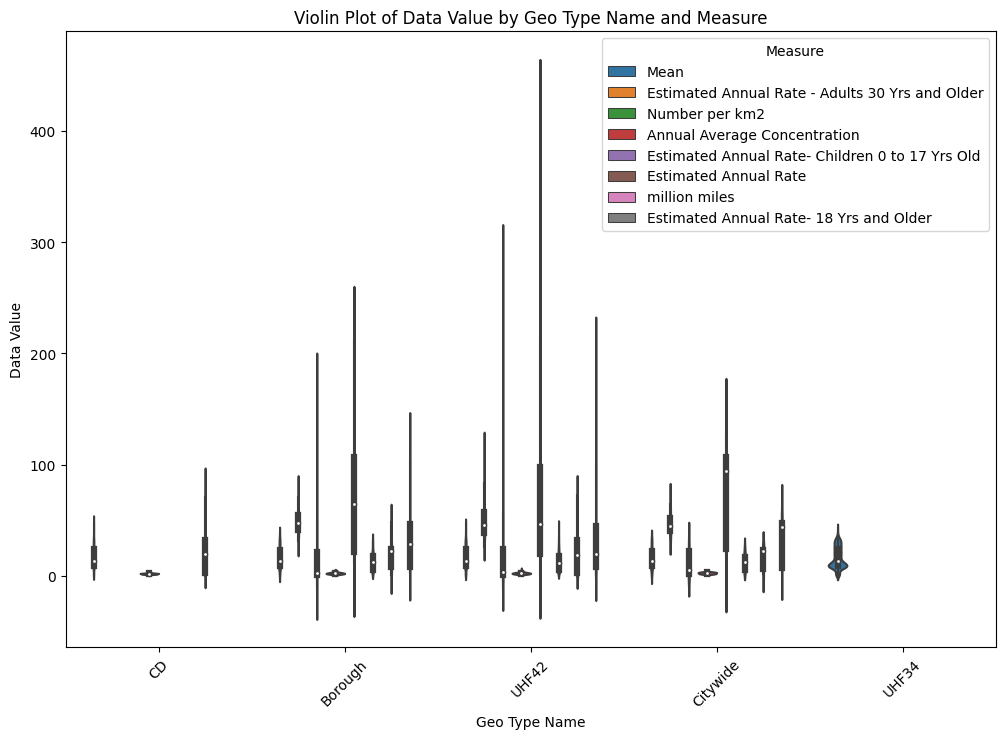

In [15]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Geo Type Name', y='Data Value', hue='Measure', data=data)
plt.title('Violin Plot of Data Value by Geo Type Name and Measure')
plt.xlabel('Geo Type Name')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.legend(title='Measure')
plt.show()

In [18]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.0 MB/s eta 0:00:00


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
columns=['Unique ID','Indicator ID','Geo Join ID']

In [21]:
X=data[columns]
y=data['Data Value']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

Results for Linear Regression
Mean Squared Error (MSE): 388.4882051646463
Mean-Absoulte Error(MAE): 11.510336526653827
R-Squared Score: 0.07692320187526869


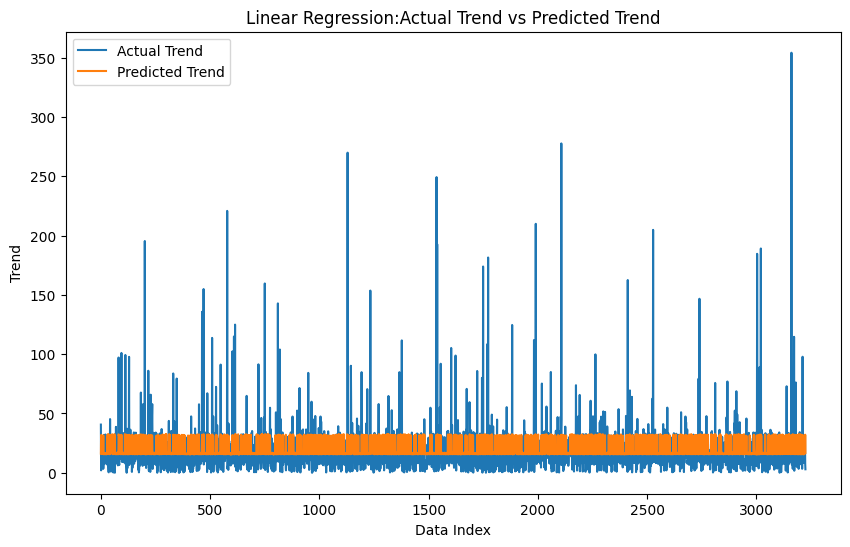


Results for Decision Tree
Mean Squared Error (MSE): 59.29830577443164
Mean-Absoulte Error(MAE): 3.3152467061686823
R-Squared Score: 0.8591028260297235


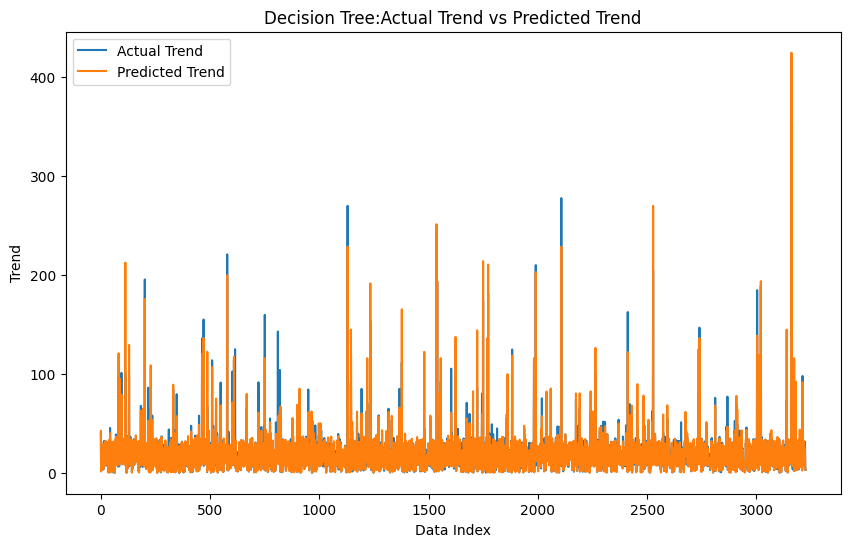


Results for Random Forest
Mean Squared Error (MSE): 44.68412872513991
Mean-Absoulte Error(MAE): 2.811113580864115
R-Squared Score: 0.8938271949514799


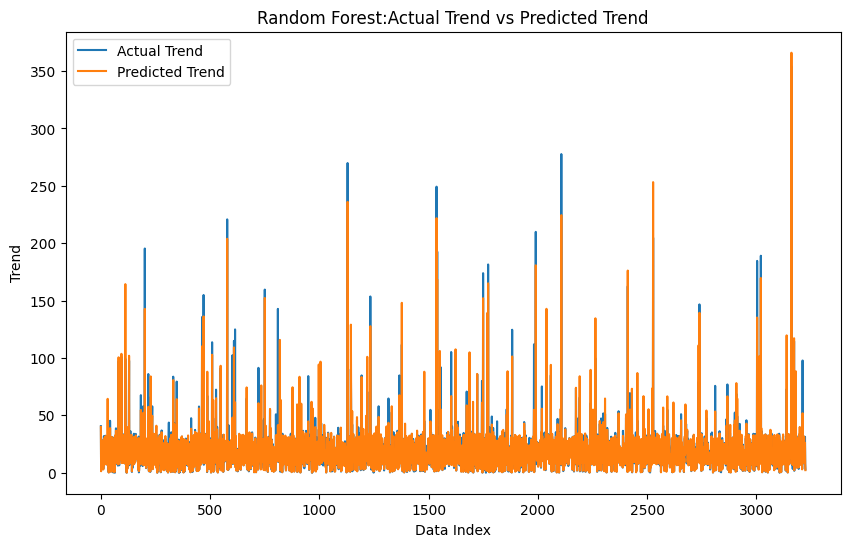


Results for SVR
Mean Squared Error (MSE): 444.09233053633676
Mean-Absoulte Error(MAE): 11.028454961822737
R-Squared Score: -0.05519632538006514


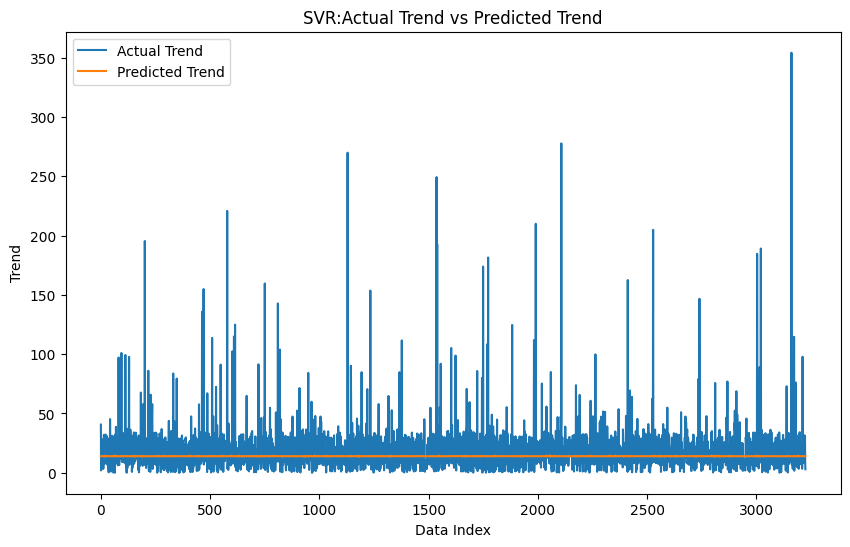


Results for XGBoost
Mean Squared Error (MSE): 54.14515795579476
Mean-Absoulte Error(MAE): 2.9685883259319326
R-Squared Score: 0.8713470875683069


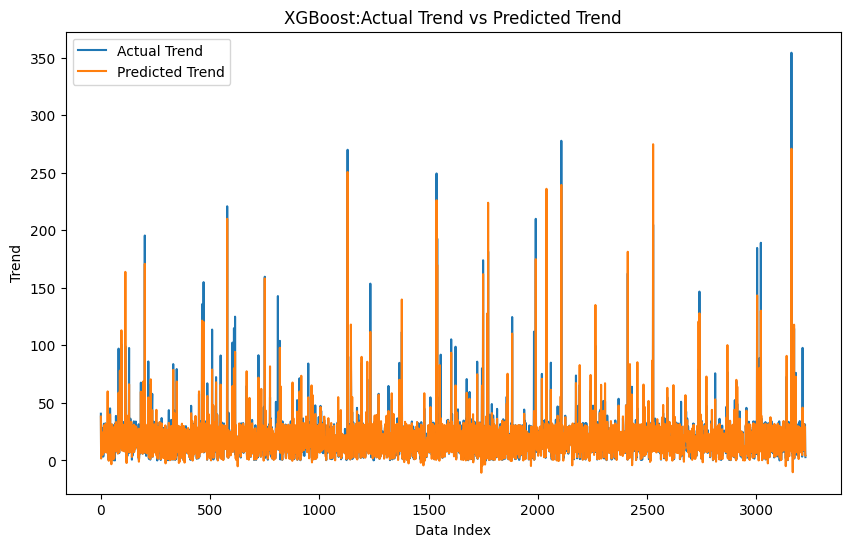


Results for LightGBM
Mean Squared Error (MSE): 61.938016034715346
Mean-Absoulte Error(MAE): 3.586674357761771
R-Squared Score: 0.8528306786063364


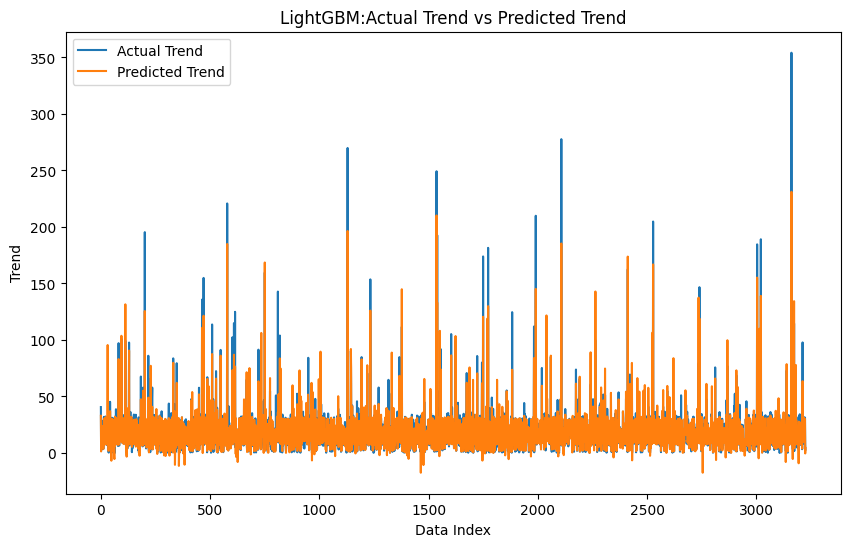


Results for Gradient Boosting Regressor
Mean Squared Error (MSE): 127.46981298333529
Mean-Absoulte Error(MAE): 4.6964214659703885
R-Squared Score: 0.6971222671320285


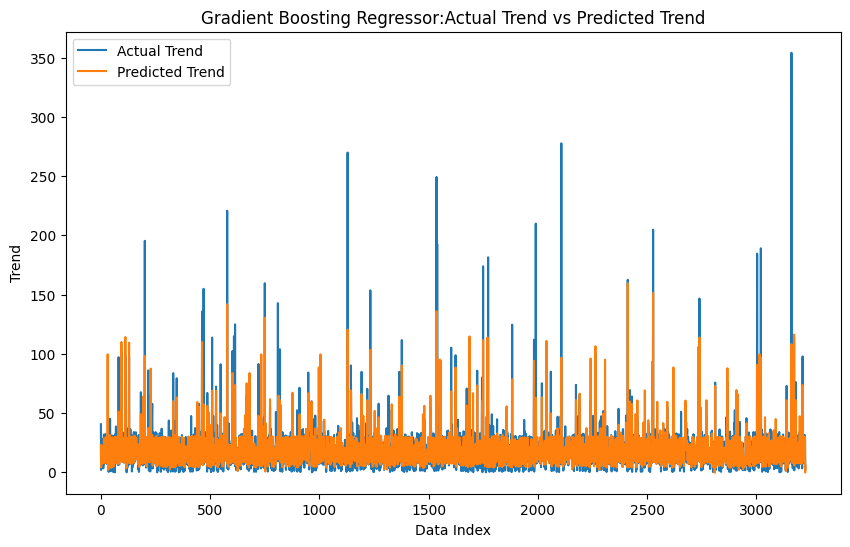


Results for ADA Boost
Mean Squared Error (MSE): 260.80060818172535
Mean-Absoulte Error(MAE): 8.235001035555202
R-Squared Score: 0.3803184056840505


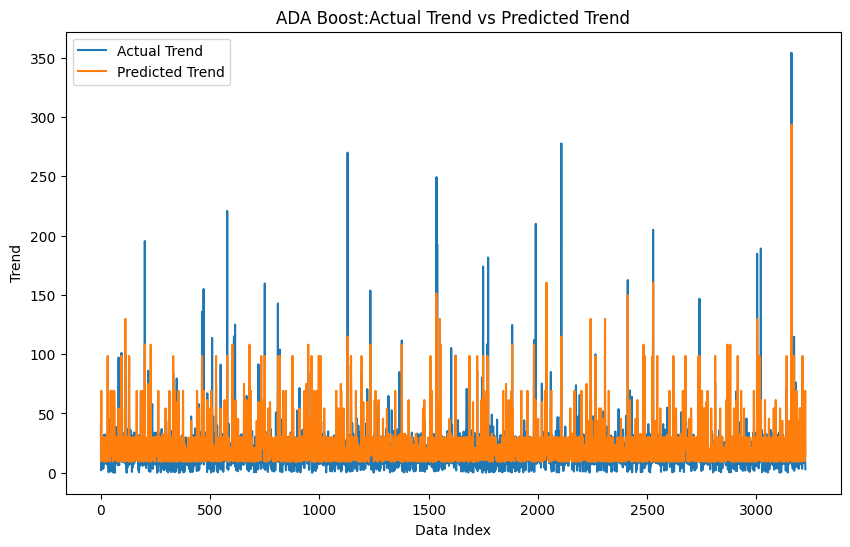


Results for K Neighbors Regressor
Mean Squared Error (MSE): 150.27869779173216
Mean-Absoulte Error(MAE): 4.09019645335386
R-Squared Score: 0.6429266645942173


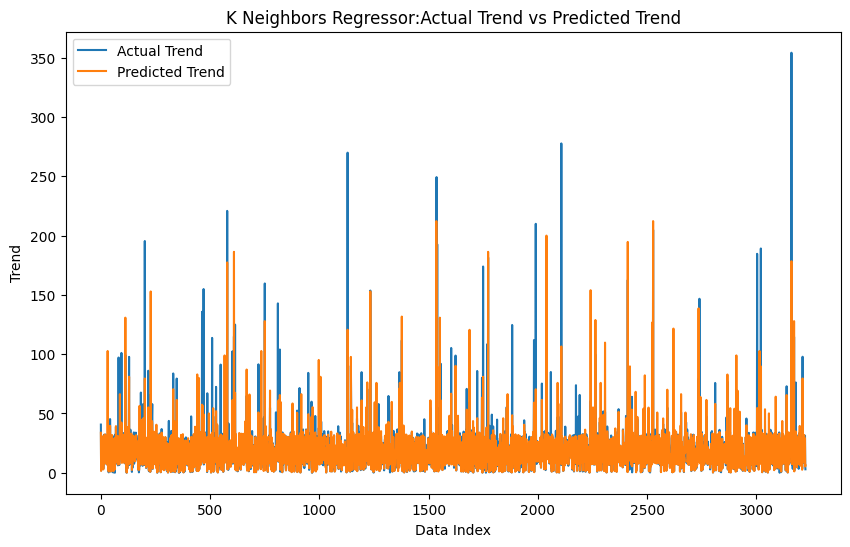


Learning rate set to 0.061325
0:	learn: 21.5039803	total: 49.8ms	remaining: 49.8s
1:	learn: 20.9644504	total: 52.7ms	remaining: 26.3s
2:	learn: 20.5525195	total: 55.1ms	remaining: 18.3s
3:	learn: 20.1629449	total: 57.4ms	remaining: 14.3s
4:	learn: 19.8377428	total: 59.6ms	remaining: 11.9s
5:	learn: 19.4989747	total: 62ms	remaining: 10.3s
6:	learn: 19.2055684	total: 64.7ms	remaining: 9.17s
7:	learn: 18.8097802	total: 67.2ms	remaining: 8.33s
8:	learn: 18.4616983	total: 69.7ms	remaining: 7.67s
9:	learn: 18.1924309	total: 72.1ms	remaining: 7.14s
10:	learn: 17.9078889	total: 74.6ms	remaining: 6.71s
11:	learn: 17.7336196	total: 77.4ms	remaining: 6.37s
12:	learn: 17.5367073	total: 79.9ms	remaining: 6.06s
13:	learn: 17.2673648	total: 82.4ms	remaining: 5.8s
14:	learn: 17.0256656	total: 84.9ms	remaining: 5.58s
15:	learn: 16.8245710	total: 87.5ms	remaining: 5.38s
16:	learn: 16.6831349	total: 90ms	remaining: 5.2s
17:	learn: 16.5239209	total: 92.5ms	remaining: 5.05s
18:	learn: 16.3383079	total: 95

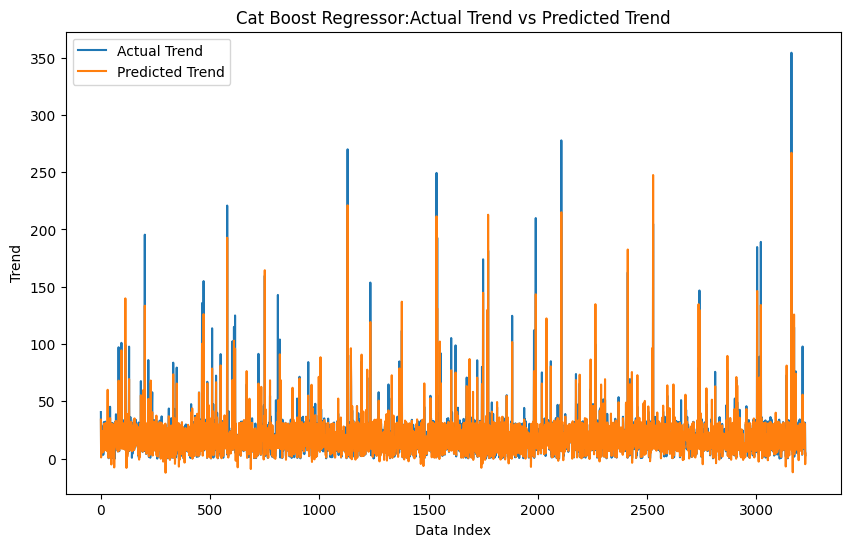

In [25]:
Name = ['Linear Regression','Decision Tree','Random Forest',
        'SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,
        'K Neighbors Regressor','Cat Boost Regressor']
accuracy=[]
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Results for {name}")
  print('Mean Squared Error (MSE):',mse)
  print('Mean-Absoulte Error(MAE):',mae)
  print('R-Squared Score:',r2)
  plt.figure(figsize=(10,6))
  plt.plot(np.arange(len(y_test)),y_test,label='Actual Trend')
  plt.plot(np.arange(len(y_test)),y_pred,label='Predicted Trend')
  plt.xlabel('Data Index')
  plt.ylabel('Trend')
  plt.title(f"{name}:Actual Trend vs Predicted Trend")
  plt.legend()
  plt.show()
  accuracy.append(r2)
  print()

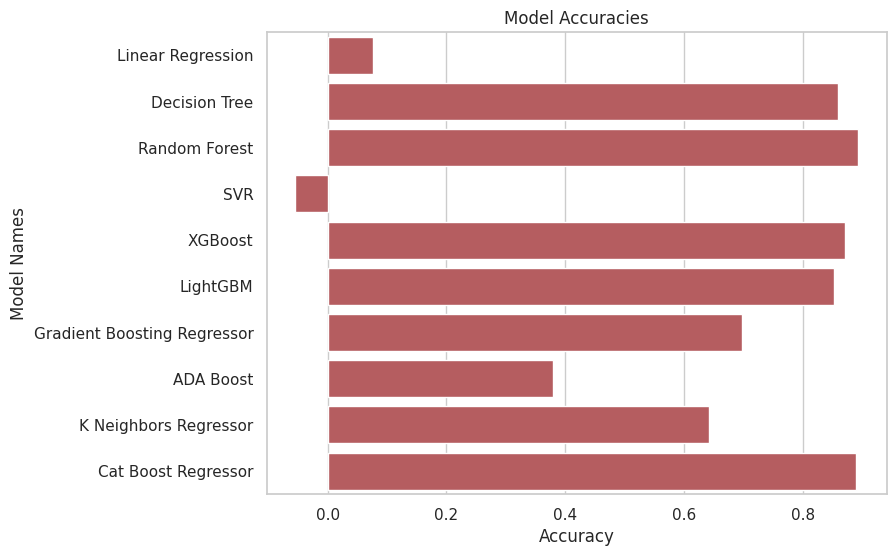

In [27]:
data=pd.DataFrame({'Names':Name,'Accuracies':accuracy})
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(x='Accuracies',y='Names',data=data,color='r')
plt.xlabel('Accuracy')
plt.ylabel('Model Names')
plt.title('Model Accuracies')
plt.show()